In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter

def smooth_1d(y, method='gaussian', window=11, sigma=2, polyorder=3):
    """
    Smooth 1D data.

    Parameters
    ----------
    y : array_like
        Input 1D data (noisy signal).
    method : str, optional
        Smoothing method: 'moving', 'gaussian', or 'savgol' (default: 'gaussian').
    window : int, optional
        Window length for moving average or Savitzky–Golay filter (must be odd).
    sigma : float, optional
        Standard deviation for Gaussian filter.
    polyorder : int, optional
        Polynomial order for Savitzky–Golay filter.

    Returns
    -------
    y_smooth : np.ndarray
        Smoothed signal.
    """
    y = np.asarray(y)
    if y.ndim != 1:
        raise ValueError("Input must be 1D.")

    if method == 'moving':
        if window < 1:
            raise ValueError("window must be >= 1")
        kernel = np.ones(window) / window
        y_smooth = np.convolve(y, kernel, mode='same')

    elif method == 'gaussian':
        y_smooth = gaussian_filter1d(y, sigma=sigma, mode='nearest')

    elif method == 'savgol':
        # window must be odd and >= polyorder + 2
        if window % 2 == 0:
            window += 1
        y_smooth = savgol_filter(y, window_length=window, polyorder=polyorder)

    else:
        raise ValueError("method must be 'moving', 'gaussian', or 'savgol'")

    return y_smooth


In [3]:
data_folder = '/group/ag_compstatphys/data/tolga/simulation'

In [4]:
sim_file = 'lj_production_T1_0_rho_0_7.h5'

In [5]:
ssf_path = 'structure/all/all/static_structure_factor/value'

dm_path = 'structure/all/density_mode/value'

wavevector_path = 'structure/all/density_mode/wavevector'

wavenumber_path = 'structure/all/all/static_structure_factor/wavenumber'

In [6]:
file_path = f'{data_folder}/{sim_file}'
with h5py.File(file_path, 'r') as sim_data:
    ssf = np.array(sim_data[ssf_path])
    dm = np.array(sim_data[dm_path])
    wavevector = np.array(sim_data[wavevector_path])
    wavenumber = np.array(sim_data[wavenumber_path])


In [7]:
print(f'ssf shape: {ssf.shape}')
print(f'dm shape: {dm.shape}')
print(f'wavevector shape: {wavevector.shape}')
print(f'wavenumber shape: {wavenumber.shape}')

ssf shape: (1001, 124, 3)
dm shape: (1001, 854, 2)
wavevector shape: (854, 3)
wavenumber shape: (124,)


In [8]:
ssf_sampled = np.mean(ssf, axis = 0)
dm_sampled = np.mean(dm, axis = 0)

In [9]:
rho_complex = dm[..., 0] + 1j * dm[..., 1]

N = 100000  # total number of particles
S_k = np.mean(np.abs(rho_complex)**2, axis=0) / N

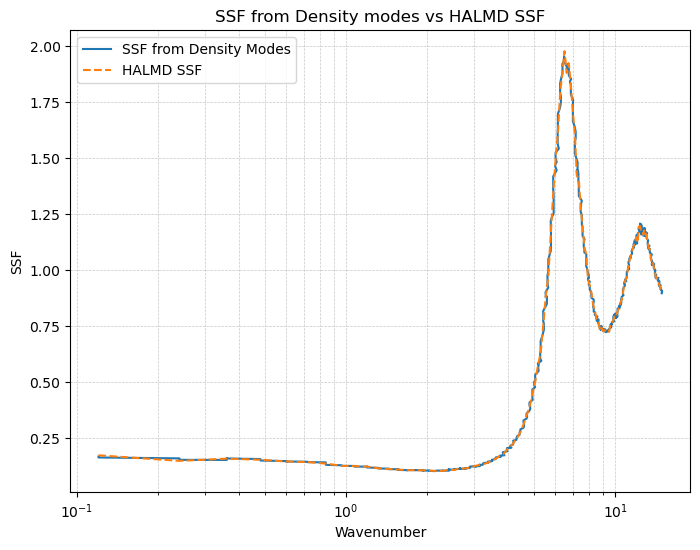

In [10]:
from matplotlib.ticker import ScalarFormatter


wavevector_lin = np.linalg.norm(wavevector, axis = 1)

S_k_smooth = smooth_1d(S_k, 'gaussian', sigma = 2)





plt.figure(figsize=(8, 6))
plt.plot(wavevector_lin, S_k_smooth, label = 'SSF from Density Modes')

plt.plot(wavenumber, ssf_sampled[:,0], label = 'HALMD SSF', ls = '--')

#plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.title('SSF from Density modes vs HALMD SSF')

plt.xlabel('Wavenumber')
plt.ylabel('SSF')
plt.xscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()

plt.show()

In [11]:
production_NVT = 'slit_pore__production_NVT_D15_rho0.7_T1.00_20251025_203202.h5'

In [12]:
dm_bulk_parallel_path = 'density_mode/global_parallel/bulk/value'
dm_bulk_perpendicular_path = 'density_mode/global_perpendicular/bulk/value'


wavevector_bulk_parallel_path = 'density_mode/global_parallel/bulk/wavevector'
wavevector_bulk_perpendicular_path = 'density_mode/global_perpendicular/bulk/wavevector'

ssf_bulk_parallel_path = 'ssf/global_parallel/bulk/value'
ssf_bulk_perpendicular_path = 'ssf/global_perpendicular/bulk/value'

wavenumber_bulk_parallel_path = 'ssf/global_parallel/bulk/wavenumber'
wavenumber_bulk_perpendicular_path = 'ssf/global_perpendicular/bulk/wavenumber'

In [13]:
sim_file = production_NVT

In [14]:
file_path = f'{data_folder}/{sim_file}'
with h5py.File(file_path, 'r') as sim_data:
    dm_bulk_parallel = np.array(sim_data[dm_bulk_parallel_path])
    dm_bulk_perpendicular = np.array(sim_data[dm_bulk_perpendicular_path])


    wavevector_bulk_parallel = np.array(sim_data[wavevector_bulk_parallel_path])
    wavevector_bulk_perpendicular = np.array(sim_data[wavevector_bulk_perpendicular_path])

    ssf_bulk_parallel = np.array(sim_data[ssf_bulk_parallel_path])
    ssf_bulk_perpendicular = np.array(sim_data[ssf_bulk_perpendicular_path])

    wavenumber_bulk_parallel = np.array(sim_data[wavenumber_bulk_parallel_path])
    wavenumber_bulk_perpendicular = np.array(sim_data[wavenumber_bulk_perpendicular_path])


In [15]:
ssf_bulk_parallel_sampled = np.mean(ssf_bulk_parallel, axis = 0)
ssf_bulk_perpendicular_sampled = np.mean(ssf_bulk_perpendicular, axis = 0)

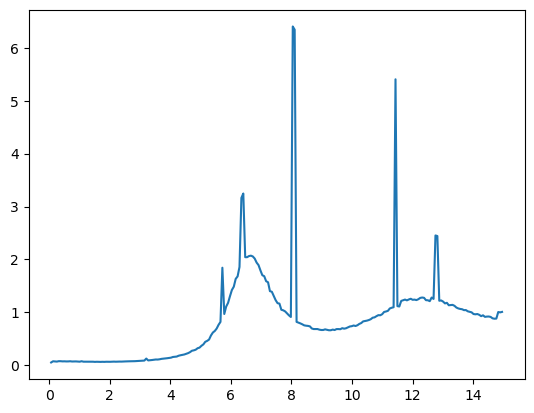

In [16]:
plt.plot(wavenumber_bulk_parallel, ssf_bulk_parallel_sampled[:,0])

In [17]:
dm_bulk_parallel.shape

(1001, 1627, 2)

In [18]:
wavevector_bulk_parallel.shape

(1627, 3)

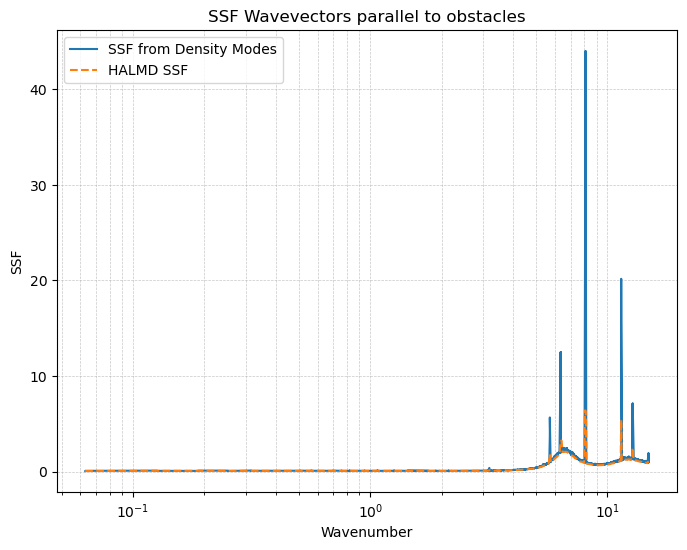

In [19]:
rho_complex = dm_bulk_parallel[..., 0] + 1j * dm_bulk_parallel[..., 1]

N = 100000  # total number of particles
S_k = np.mean(np.abs(rho_complex)**2, axis=0) / N


wavevector_lin = np.linalg.norm(wavevector_bulk_parallel, axis = 1)

S_k_smooth = smooth_1d(S_k, 'gaussian', sigma = 2)



plt.figure(figsize=(8, 6))
plt.plot(wavevector_lin, S_k, label = 'SSF from Density Modes')

plt.plot(wavenumber_bulk_parallel, ssf_bulk_parallel_sampled[:,0], '--', label = 'HALMD SSF')

#plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.title('SSF Wavevectors parallel to obstacles')

plt.xlabel('Wavenumber')
plt.ylabel('SSF')
plt.xscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()


plt.show()

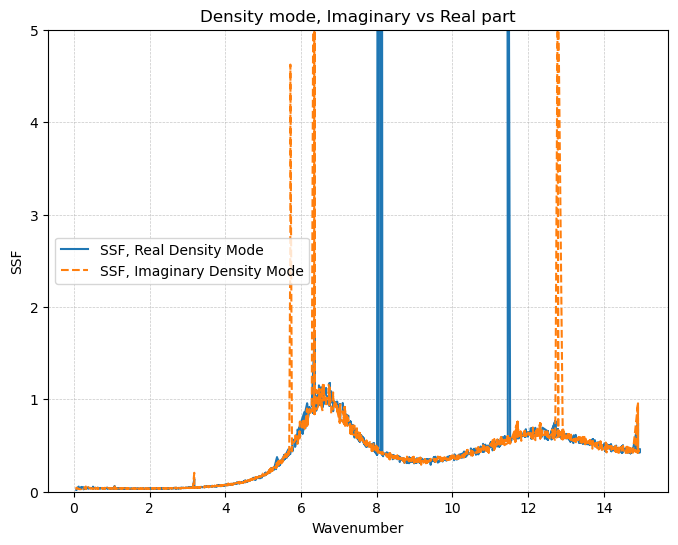

In [20]:
plt.figure(figsize=(8, 6))

rho = dm_bulk_parallel
N_sample = dm_bulk_parallel.shape[0]
N_fluid_particles = 111650

S = np.einsum('ika,ikb->kab', rho, rho) / N_sample / N_fluid_particles


wavevector_lin = np.linalg.norm(wavevector_bulk_parallel, axis = 1)

plt.plot(wavevector_lin, S[:,0,0], label = 'SSF, Real Density Mode')
plt.plot(wavevector_lin, S[:,1,1], '--', label = 'SSF, Imaginary Density Mode')


####################        ^           ^   Corresponds to different peaks in SSF
#########                                   Important ^^^^^

#plt.plot(wavenumber_bulk_parallel,ssf_bulk_parallel_sampled[:,0])



plt.ylim(0,5)

plt.title('Density mode, Imaginary vs Real part')

plt.xlabel('Wavenumber')
plt.ylabel('SSF')
#plt.xscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()

plt.show()

SSF middle slab rho_bulk*rho_middle :

In [21]:
dm_ms_parallel_path         = 'density_mode/slab_60/parallel/value'
wavevector_ms_parallel_path = 'density_mode/slab_60/parallel/wavevector'
ssf_ms_parallel_path        = 'ssf/slab_60/parallel/value'
wavenumber_ms_parallel_path = 'ssf/slab_60/parallel/wavenumber'

In [22]:
file_path = f'{data_folder}/{sim_file}'
with h5py.File(file_path, 'r') as sim_data:
    dm_ms_parallel = np.array(sim_data[dm_ms_parallel_path])

    wavevector_ms_parallel = np.array(sim_data[wavevector_ms_parallel_path])

    ssf_ms_parallel = np.array(sim_data[ssf_ms_parallel_path])

    wavenumber_ms_parallel = np.array(sim_data[wavenumber_ms_parallel_path])



In [23]:
rho_mid = dm_ms_parallel
rho_bulk = dm_bulk_parallel

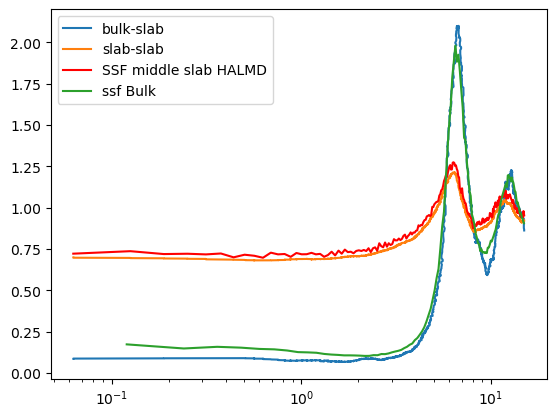

In [24]:
N_slab_particles = 1957


S_sb = np.einsum('ika,ikb->kab', rho_mid, rho_bulk)/ N_sample / N_slab_particles
S_ss = np.einsum('ika,ikb->kab', rho_mid, rho_mid)/ N_sample / N_slab_particles


smooth_window = 101

S_sb_smooth_00 = smooth_1d(S_sb[:,0,0], method='savgol', window=smooth_window, polyorder=3)
S_sb_smooth_11 = smooth_1d(S_sb[:,1,1], method='savgol', window=smooth_window, polyorder=3)

S_ss_smooth_00 = smooth_1d(S_ss[:,0,0], method='savgol', window=smooth_window, polyorder=3)
S_ss_smooth_11 = smooth_1d(S_ss[:,1,1], method='savgol', window=smooth_window, polyorder=3)


wavevector_lin = np.linalg.norm(wavevector_bulk_parallel, axis = 1) 

plt.plot(wavevector_lin, S_sb_smooth_00 + S_sb_smooth_11, label = 'bulk-slab' )
plt.plot(wavevector_lin, S_ss_smooth_00 + S_ss_smooth_11, label = 'slab-slab' )


plt.plot(wavenumber_ms_parallel, np.mean(ssf_ms_parallel, axis = 0)[:,0], color = 'red', label = 'SSF middle slab HALMD')

#plt.plot(wavenumber_bulk_parallel,ssf_bulk_parallel_sampled[:,0])

plt.xscale('log')
plt.plot(wavenumber, ssf_sampled[:, 0], label = 'ssf Bulk')

plt.legend()

#plt.ylim(0,5)

In [25]:
rho_mid.shape

(1001, 1627, 2)

/usr/lib/python3/dist-packages/scipy/signal/_savitzky_golay.py:339: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


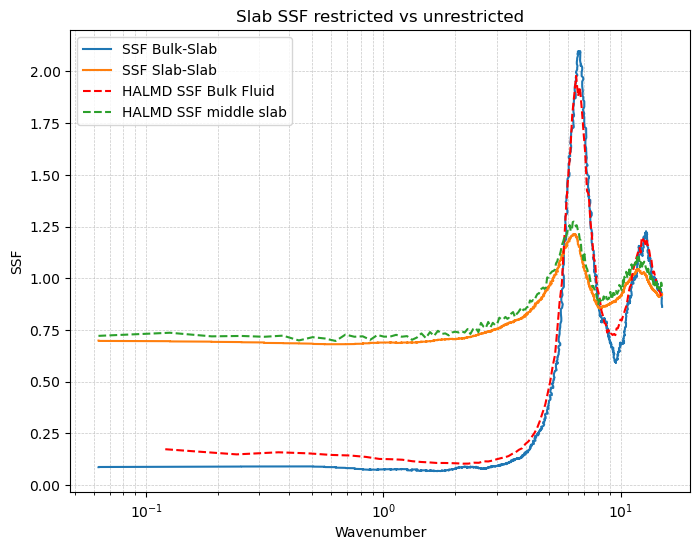

In [26]:
plt.figure(figsize=(8, 6))


rho_mid = dm_ms_parallel[..., 0] + 1j * dm_ms_parallel[..., 1]
rho_bulk = dm_bulk_parallel[..., 0] + 1j * dm_bulk_parallel[..., 1]

N_slab_particles = 1957


S_sb = np.mean(rho_mid * np.conj(rho_bulk), axis=0) / N_slab_particles
S_ss = np.mean(rho_mid * np.conj(rho_mid), axis=0) / N_slab_particles


wavevector_lin = np.linalg.norm(wavevector_bulk_parallel, axis = 1)


smooth_window = 101

S_sb_smooth = smooth_1d(S_sb, method='savgol', window=smooth_window, polyorder=3)
S_ss_smooth = smooth_1d(S_ss, method='savgol', window=smooth_window, polyorder=3)

plt.plot(wavevector_lin, S_sb_smooth, label = 'SSF Bulk-Slab')
plt.plot(wavevector_lin, S_ss_smooth, label = 'SSF Slab-Slab')

plt.plot(wavenumber, ssf_sampled[:,0], label = 'HALMD SSF Bulk Fluid', ls = '--', color = 'red')

plt.plot(wavenumber_ms_parallel, np.mean(ssf_ms_parallel, axis = 0)[:,0], label = 'HALMD SSF middle slab', ls = '--')



plt.title('Slab SSF restricted vs unrestricted')

plt.xlabel('Wavenumber')
plt.ylabel('SSF')
plt.xscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()


plt.show()

In [27]:
dm_slab60_path = 'density_mode/slab_60/parallel/value'
dm_slab61_path = 'density_mode/slab_61/parallel/value'


file_path = f'{data_folder}/{sim_file}'
with h5py.File(file_path, 'r') as sim_data:
    dm_slab60 = np.array(sim_data[dm_slab60_path])
    dm_slab61 = np.array(sim_data[dm_slab61_path])





In [28]:
dm_slab60.shape

(1001, 1627, 2)

In [29]:
np.stack((dm_slab60, dm_slab61)).shape

(2, 1001, 1627, 2)

In [30]:
array_list = [dm_slab60, dm_slab61]